# Importing Libraries

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier

# Loading the dataset and Visualisation

In [186]:
df_train = pd.read_csv('train.csv')
df_train.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [187]:
#this makes clear that the problem is of binary-class classification.
df_train['target'].unique()

array(['no', 'yes'], dtype=object)

In [162]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [188]:
df_train.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


1.   **Age:**
  - Mean age is 42, with outliers on the upper end, likely representing older customers.
2.  **Balance:**
  - Mean balance is approximately 5441, with substantial outliers at both low and high extremes, indicating some customers have negative balances while others have very high ones.

In [189]:
df_train.isna().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

/var/folders/bc/c6rj2vjx42xg3czzc00v6qc00000gn/T/ipykernel_3420/3505514894.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df_train, palette='viridis')


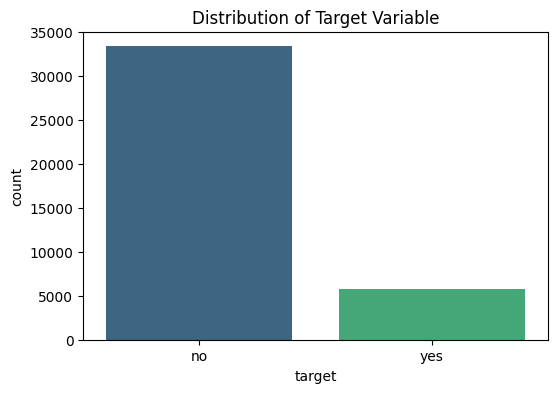

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df_train, palette='viridis')
plt.title("Distribution of Target Variable")
plt.show()

This imbalance indicates that the majority of the dataset belongs to the "no" class, which may require handling methods (e.g., oversampling) for balanced modeling.

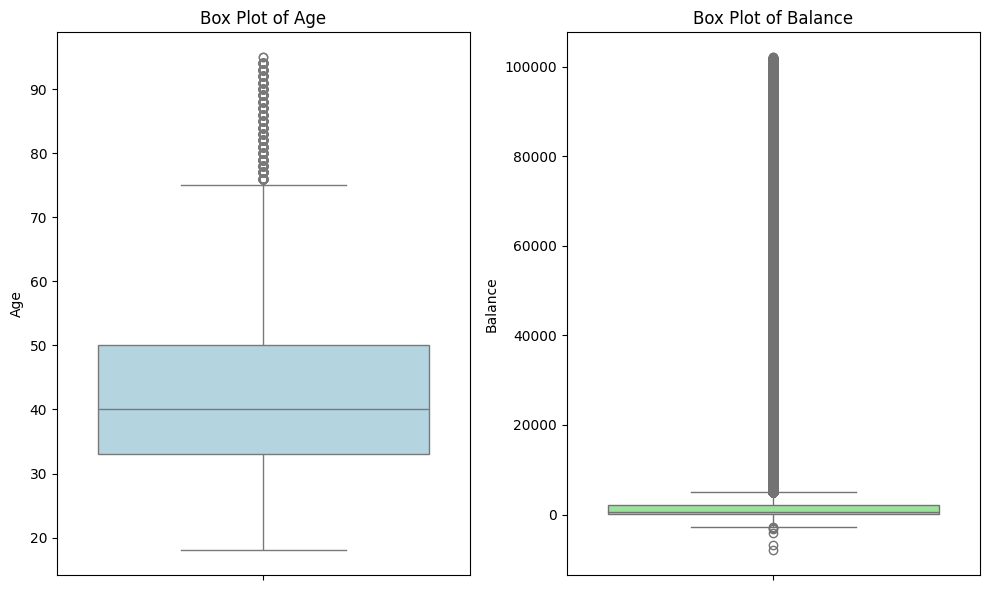

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a vertical box plot for 'age'
plt.subplot(1, 2, 1)
sns.boxplot(y=df_train['age'], color='lightblue')
plt.title('Box Plot of Age')
plt.ylabel('Age')

# Create a vertical box plot for 'balance'
plt.subplot(1, 2, 2)
sns.boxplot(y=df_train['balance'], color='lightgreen')
plt.title('Box Plot of Balance')
plt.ylabel('Balance')

# Adjust layout
plt.tight_layout()
plt.show()

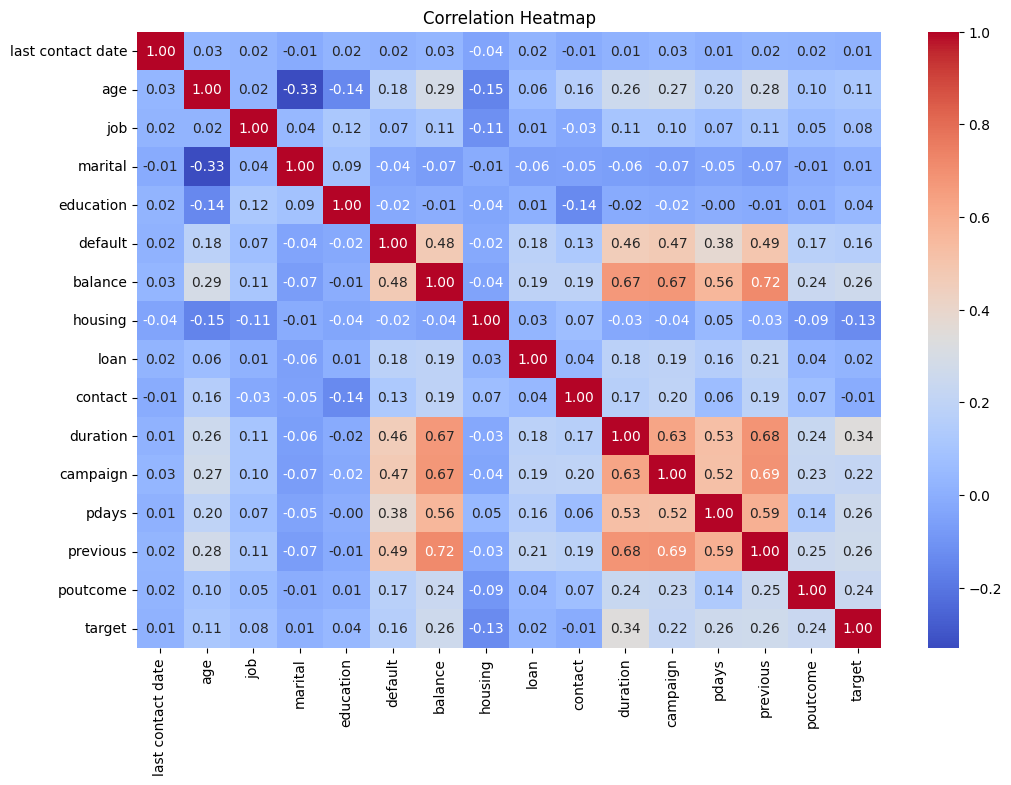

In [194]:
# Convert categorical variables for correlation analysis
from sklearn.preprocessing import LabelEncoder

# Encoding categorical columns to numerical values
encoded_data = df_train.copy()
for col in encoded_data.select_dtypes(include=['object']).columns:
    encoded_data[col] = LabelEncoder().fit_transform(encoded_data[col].astype(str))

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(encoded_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

The top features with a strong positive correlation with the target are:

    - duration (0.34): Positive correlation, meaning longer durations may associate with a positive outcome.
    - previous (0.26): Indicates prior contacts may influence a positive outcome.
    - pdays (0.26) and balance (0.26): Higher account balances also correlate with a positive outcome.
    - Features like housing show a negative correlation (-0.129), meaning individuals without housing loans may be more likely to say "yes."

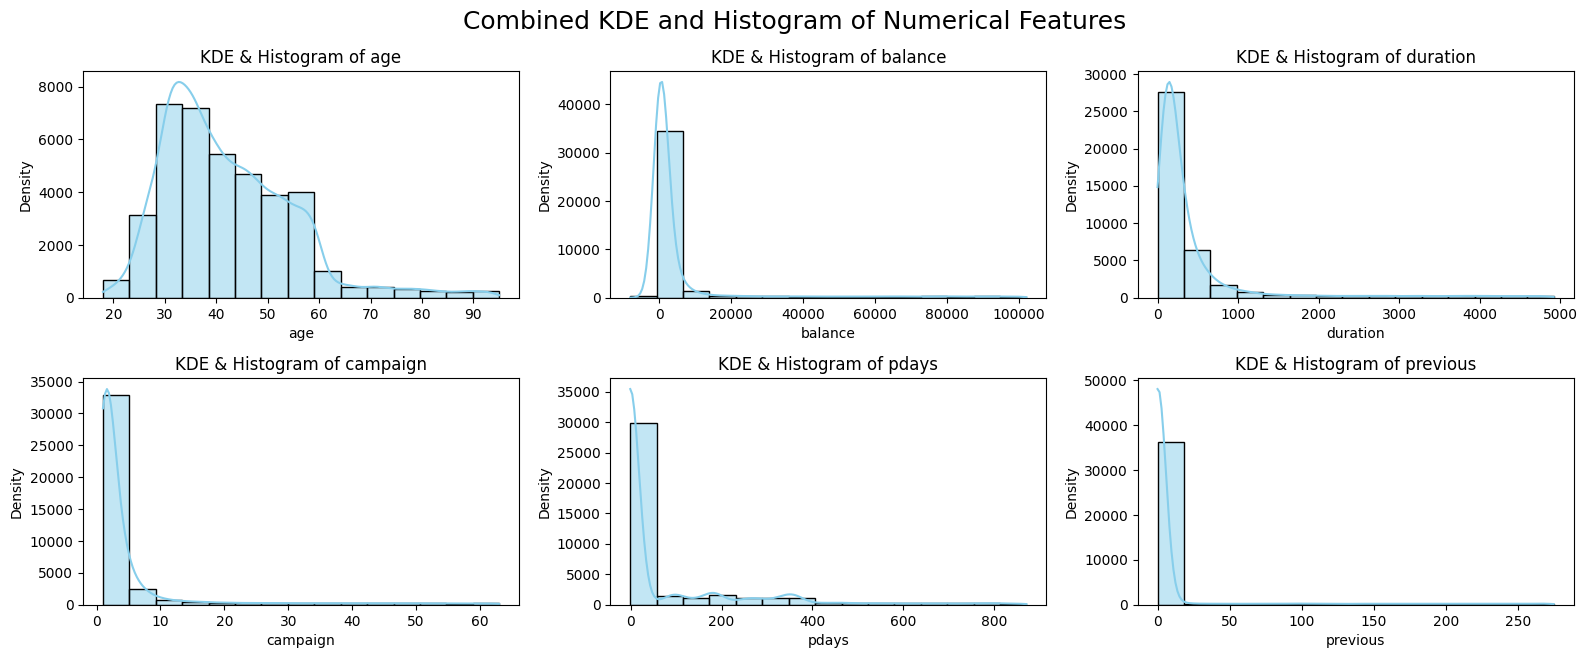

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns

# Set up the plot grid
plt.figure(figsize=(16, 12))

# Create a combined KDE and histogram plot for each numerical feature
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df_train[col], kde=True, color="skyblue", edgecolor="black", bins=15, alpha=0.5)
    plt.title(f"KDE & Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")

plt.tight_layout()
plt.suptitle("Combined KDE and Histogram of Numerical Features", fontsize=18, y=1.02)
plt.show()


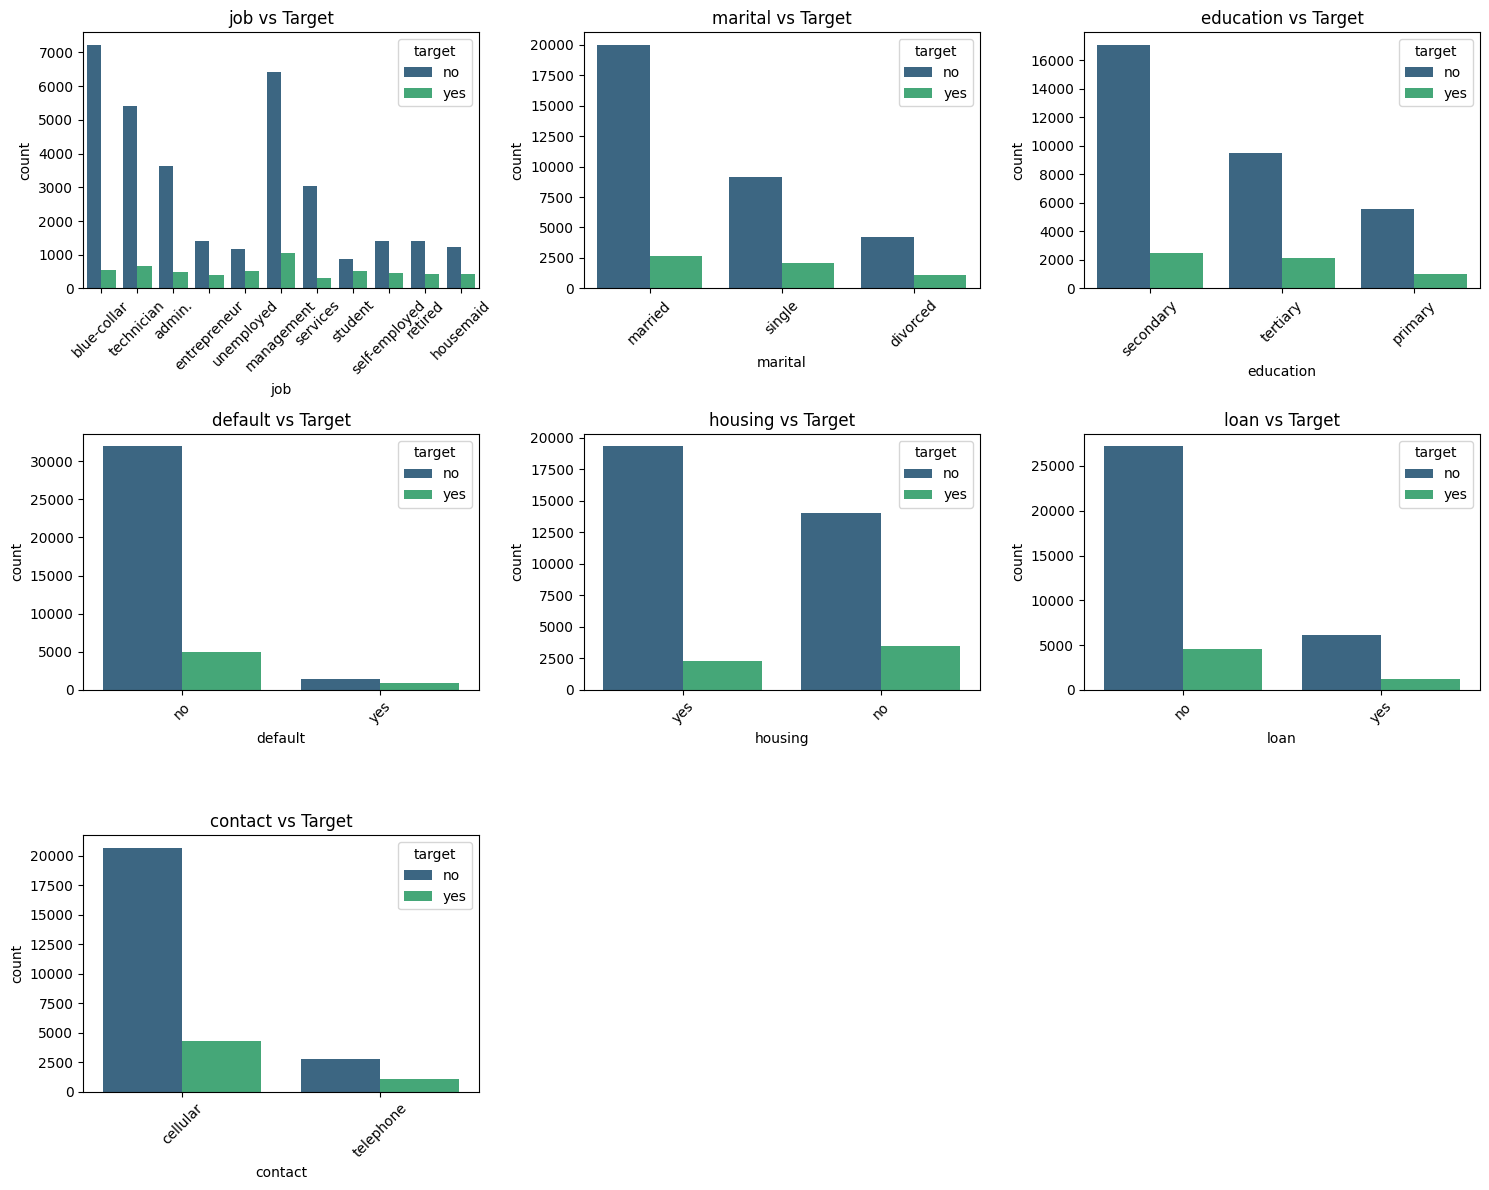

In [199]:
# Analyze categorical features with respect to the target
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df_train, x=col, hue='target', palette='viridis')
    plt.title(f"{col} vs Target")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

    - Job: Students and the unemployed have higher proportions of positive responses (yes).
    - Marital Status: Divorced individuals show a higher likelihood of saying "yes" compared to married and single individuals.
    - Education: Those with tertiary education have a higher percentage of positive responses.
    - Default: Individuals without a credit default history are more likely to respond positively.
    - Housing Loan: Individuals without housing loans have a higher likelihood of responding positively.
    - Contact Type: Those contacted by telephone have a higher response rate than those contacted by cellular phone.

# Feature Engineering

In [163]:
df_train['last contact date'] = pd.to_datetime(df_train['last contact date'])
df_train['day'] = df_train['last contact date'].dt.day
df_train['month'] = df_train['last contact date'].dt.month
df_train['year'] = df_train['last contact date'].dt.year
df_train.drop(columns=['last contact date','contact'],inplace=True)

Deleting Contact as well, becuase of negative correlation

In [164]:
X,y = df_train.drop(columns=['target']),df_train['target']

# applying label encoding on target column

In [167]:
label = LabelEncoder()
y = label.fit_transform(y)

# Splitting the data

In [169]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Preprocessing
  - Imputation (Missing Value)
  - Encoding (Categorical -> Numerical)

In [171]:

cat_imputer_onehot = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('hot',OneHotEncoder(handle_unknown='ignore'))
])
cat_imputer_ordinal = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('hot',OrdinalEncoder())
])

cat_endcoding = ColumnTransformer([
    ('one_hot',cat_imputer_onehot,['job','loan','marital','housing']),
    ('ordinal',cat_imputer_ordinal,['education','default','poutcome'])
],remainder='passthrough')

In [172]:
X_train = cat_endcoding.fit_transform(X_train)
X_test = cat_endcoding.transform(X_test)

# MODEL FITTING with HPT

# Model 1 --> 0.757

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import GridSearchCV

model1 = BalancedRandomForestClassifier(sampling_strategy='all', replacement=True)

search = GridSearchCV(model1, param_grid={
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}, cv=3,scoring='f1_macro',n_jobs=-1)

search.fit(X_train, y_train)

# Model 2 --> 0.713

In [ ]:
# model2 = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=100,max_samples=0.5,bootstrap=False)

# search = GridSearchCV(model2,param_grid={
#     'estimator':[DecisionTreeClassifier()],
#     'n_estimators':[5,10,15,20,50,75,100],
#     'max_samples':[0.2,0.4,0.5,0.6,0.7,0.9,1],
#     'bootstrap':[True,False]
# },cv=5,n_jobs=-1,scoring='f1_macro')

# search.fit(X_train,y_train)

# print(accuracy_score(y_test,y_pred))

# Model 3 --> 0.720

In [ ]:
# model3 = GradientBoostingClassifier()

# search = GridSearchCV(estimator = model3,
#                 param_grid = {'loss':['log_loss', 'exponential'],
#                             'learning_rate':[0.001,0.01,0.1,1,10,15,20],
#                             'n_estimators':[10,20,60,100,200,300]
#                             },
#                 cv = 5,n_jobs=-1,scoring='f1_macro')


# search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10, 15, 20],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [10, 20, 60, 100, 200, 300]},
             scoring='f1')

In [176]:
print(search.best_params_)
print(search.best_score_)

{'learning_rate': 1, 'loss': 'log_loss', 'n_estimators': 100}
0.5236809381117971


In [177]:
df_test = pd.read_csv('test.csv')

In [178]:
df_test.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,2009-11-21,36,management,single,tertiary,no,7,no,no,NaN,20,1,-1,0,NaN
1,2010-02-04,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0,NaN
2,2010-07-28,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0,NaN
3,2010-06-09,38,admin.,married,primary,no,1487,no,no,NaN,332,2,-1,0,NaN
4,2008-03-02,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2,failure


In [179]:
df_test['last contact date'] = pd.to_datetime(df_test['last contact date'])
df_test['day'] = df_test['last contact date'].dt.day
df_test['month'] = df_test['last contact date'].dt.month
df_test['year'] = df_test['last contact date'].dt.year
df_test.drop(columns=['last contact date','contact'],inplace=True)

In [180]:
df_test_transformed = cat_endcoding.transform(df_test)

In [181]:
y_Pred = search.predict(df_test_transformed)

In [182]:
new_df = pd.DataFrame({'id':range(0,len(y_Pred)),'target':y_Pred})

In [183]:
new_df['target'].replace(0,'no',inplace=True)
new_df['target'].replace(1,'yes',inplace=True)

/var/folders/bc/c6rj2vjx42xg3czzc00v6qc00000gn/T/ipykernel_3420/3158143847.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['target'].replace(0,'no',inplace=True)


In [184]:
new_df.to_csv('submission.csv',index=False)